## Importar librerías

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fn
import seaborn as sns

## Carga de datasets

In [10]:
df_1 = pd.read_csv('Hospital1.csv')
print(df_1)

    id Codebook Variable         Description Category/Units  Princesa
0    1          Patients  Number of patients         Number    4661.0
1    2          DMRGENDR                 Sex         Female    2178.0
2    3          DMRGENDR                 Sex           Male    2483.0
3    4          DMRGENDR                 Sex              0       0.0
4    5          DMRAGEYR                 Age          Years      68.0
..  ..               ...                 ...            ...       ...
92  93             DATAD            Admision       Jan_2022     280.0
93  94             DATAD            Admision       Feb_2022      83.0
94  95             DATAD            Admision       Mar_2022       3.0
95  96             DATAD            Admision       Apr_2022       0.0
96  97             DATAD            Admision     Total 2022     366.0

[97 rows x 5 columns]


In [6]:
df_2 = pd.read_csv('Hospital2.csv')
print(df_2)

    id Codebook Variable         Description Category/Units  UMF_Iasis
0    1          Patients  Number of patients         Number      200.0
1    2          DMRGENDR                 Sex         Female       98.0
2    3          DMRGENDR                 Sex           Male      102.0
3    4          DMRGENDR                 Sex              0        0.0
4    5          DMRAGEYR                 Age          Years       59.0
..  ..               ...                 ...            ...        ...
92  90             DATAD            Admision       Jan_2022        0.0
93  91             DATAD            Admision       Feb_2022        0.0
94  92             DATAD            Admision       Mar_2022        0.0
95  93             DATAD            Admision       Apr_2022        0.0
96  94             DATAD            Admision     Total 2022        0.0

[97 rows x 5 columns]


In [7]:
df_3 = pd.read_csv('Hospital3.csv')
print(df_3)

    id Codebook Variable         Description Category/Units      HM
0    1          Patients  Number of patients         Number  6864.0
1    2          DMRGENDR                 Sex         Female  2896.0
2    3          DMRGENDR                 Sex           Male  3968.0
3    4          DMRGENDR                 Sex              0     0.0
4    5          DMRAGEYR                 Age          Years    65.0
..  ..               ...                 ...            ...     ...
92  93             DATAD            Admision       Jan_2022   422.0
93  94             DATAD            Admision       Feb_2022   109.0
94  95             DATAD            Admision       Mar_2022    18.0
95  96             DATAD            Admision       Apr_2022     0.0
96  97             DATAD            Admision     Total 2022   549.0

[97 rows x 5 columns]


## Combinar DataFrames

In [25]:
df_2_hospital = df_2["UMF_Iasis"]
df_3_hospital = df_3["HM"]
resultado = pd.concat([df_1, df_2_hospital, df_3_hospital], axis=1)
print(resultado)

    id Codebook Variable         Description Category/Units  Princesa  \
0    1          Patients  Number of patients         Number    4661.0   
1    2          DMRGENDR                 Sex         Female    2178.0   
2    3          DMRGENDR                 Sex           Male    2483.0   
3    4          DMRGENDR                 Sex              0       0.0   
4    5          DMRAGEYR                 Age          Years      68.0   
..  ..               ...                 ...            ...       ...   
92  93             DATAD            Admision       Jan_2022     280.0   
93  94             DATAD            Admision       Feb_2022      83.0   
94  95             DATAD            Admision       Mar_2022       3.0   
95  96             DATAD            Admision       Apr_2022       0.0   
96  97             DATAD            Admision     Total 2022     366.0   

    UMF_Iasis      HM  
0       200.0  6864.0  
1        98.0  2896.0  
2       102.0  3968.0  
3         0.0     0.0  
4  

## Añadir columnas

In [26]:
## Añadiendo la columna total, que suma las cantidades de cada hospital
resultado['Total'] = resultado['Princesa'] + resultado['UMF_Iasis'] + resultado['HM']	
print(resultado)

    id Codebook Variable         Description Category/Units  Princesa  \
0    1          Patients  Number of patients         Number    4661.0   
1    2          DMRGENDR                 Sex         Female    2178.0   
2    3          DMRGENDR                 Sex           Male    2483.0   
3    4          DMRGENDR                 Sex              0       0.0   
4    5          DMRAGEYR                 Age          Years      68.0   
..  ..               ...                 ...            ...       ...   
92  93             DATAD            Admision       Jan_2022     280.0   
93  94             DATAD            Admision       Feb_2022      83.0   
94  95             DATAD            Admision       Mar_2022       3.0   
95  96             DATAD            Admision       Apr_2022       0.0   
96  97             DATAD            Admision     Total 2022     366.0   

    UMF_Iasis      HM    Total  
0       200.0  6864.0  11725.0  
1        98.0  2896.0   5172.0  
2       102.0  3968.0   

In [126]:
## Añadiendo una columna que almacena los porcentajes de cada hospital sobre el total
resultado['Porcentaje'] = resultado['Total']/resultado['Total'][0]*100
print(resultado.head(30))

    id Codebook Variable         Description Category/Units  Princesa  \
0    1          Patients  Number of patients         Number   4661.00   
1    2          DMRGENDR                 Sex         Female   2178.00   
2    3          DMRGENDR                 Sex           Male   2483.00   
3    4          DMRGENDR                 Sex              0      0.00   
4    5          DMRAGEYR                 Age          Years     68.00   
5    6          DMRAGEYR                 Age          (<18)      3.00   
6    7          DMRAGEYR                 Age        (18-29)    101.00   
7    8          DMRAGEYR                 Age        (30-39)    187.00   
8    9          DMRAGEYR                 Age        (40-49)    404.00   
9   10          DMRAGEYR                 Age        (50-59)    714.00   
10  11          DMRAGEYR                 Age        (60-69)    870.00   
11  12          DMRAGEYR                 Age        (70-79)    921.00   
12  13          DMRAGEYR                 Age       

## Gráficos

### Porcentaje de pacientes atendidos

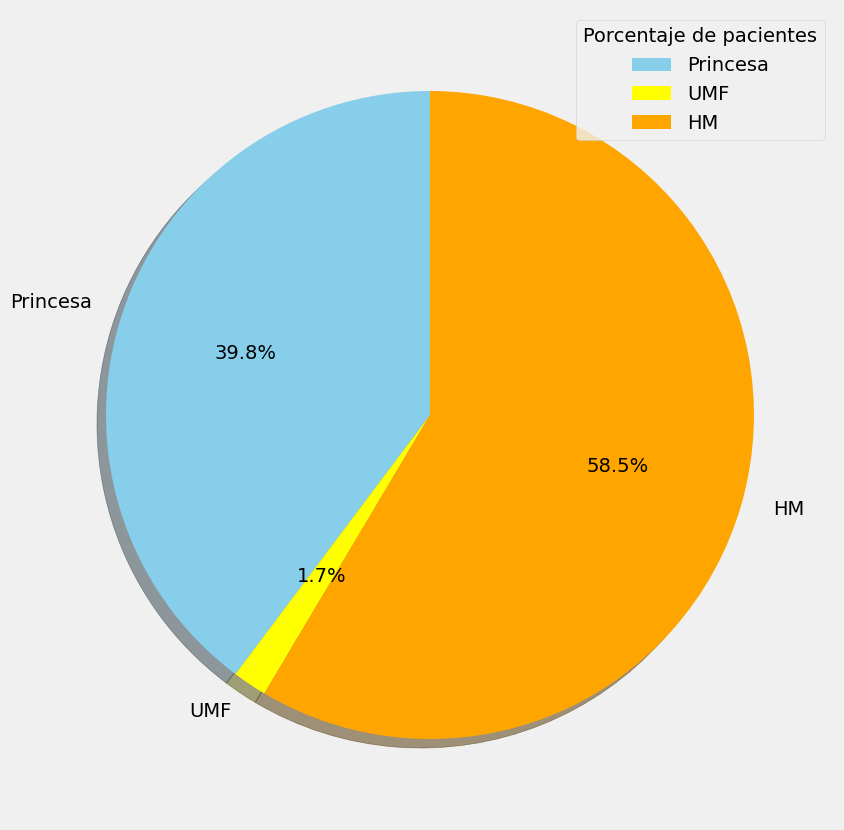

In [79]:
## Porcentaje de pacientes atendidos por cada hospital
pacientes_princesa = resultado['Princesa'][0]
pacientes_umf = resultado['UMF_Iasis'][0]
pacientes_hm = resultado['HM'][0]

## Enlistando los pacientes y los hospitales
pacientes_list = [pacientes_princesa, pacientes_umf, pacientes_hm]
hospitales_list = ['Princesa', 'UMF', 'HM']

#Graficando con Matplotlib
plt.style.use('fivethirtyeight')

plt.figure(figsize=(10, 10))

colors = ['skyblue', 'yellow', 'orange', 'red']

#El gráfico unicamente requiere una lista con los datos, y una con los labels
plt.pie(pacientes_list, labels=hospitales_list, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.legend(title='Porcentaje de pacientes')
plt.show()

### Pacientes por sexo

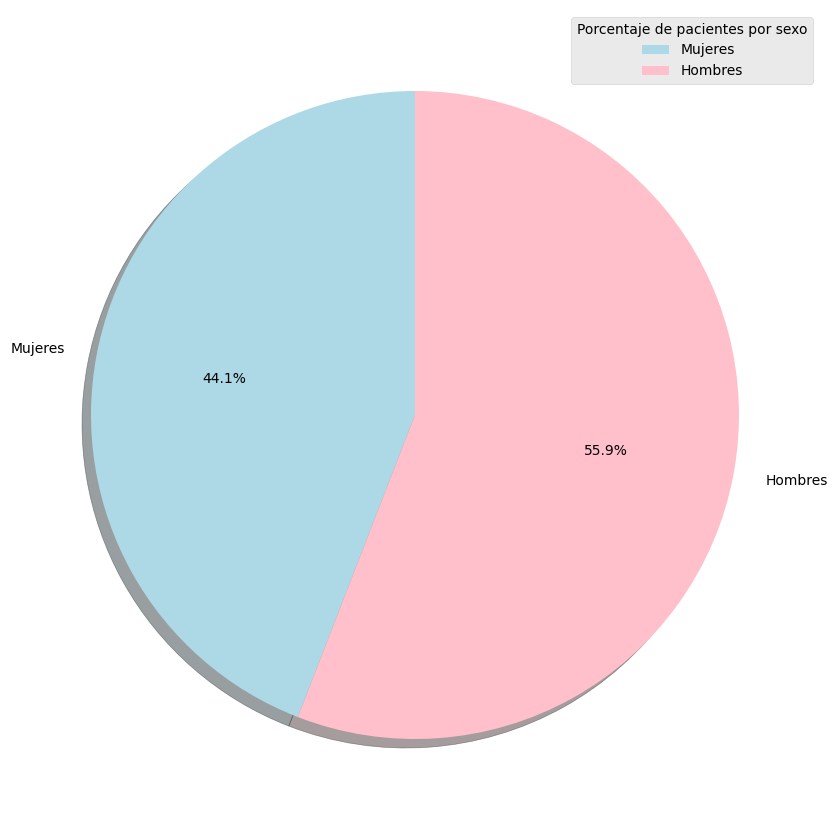

In [87]:
## Porcentaje de pacientes atendidos por cada hospital
pacientes_female = resultado['Total'][1]
pacientes_male = resultado['Total'][2]

## Enlistando los pacientes y los hospitales
pacientes_list = [pacientes_female, pacientes_male]
hospitales_list = ['Mujeres', 'Hombres']

#Graficando con Matplotlib
plt.style.use('ggplot')

plt.figure(figsize=(10, 10))

colors = ['lightblue', 'pink']

#El gráfico unicamente requiere una lista con los datos, y una con los labels
plt.pie(pacientes_list, labels=hospitales_list, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.legend(title='Porcentaje de pacientes por sexo')
plt.show()

### Gráfico por rangos de edad (gráfico pastel)

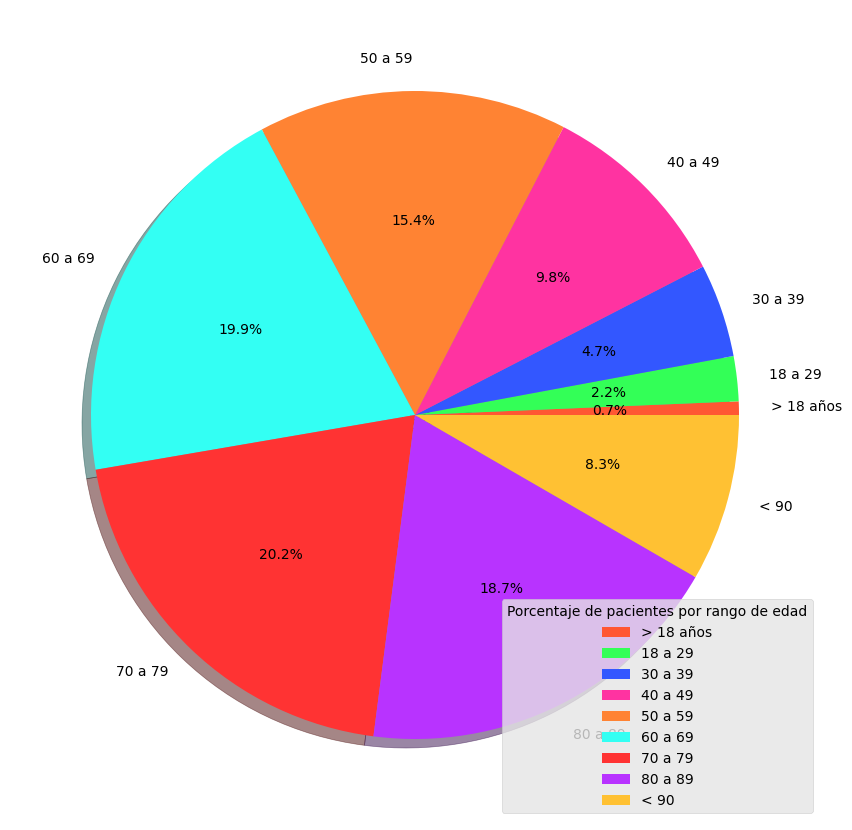

In [108]:
## Porcentaje de pacientes atendidos por cada hospital
pacientes_less18 = resultado['Total'][5]
pacientes_18to29 = resultado['Total'][6]
pacientes_30to39 = resultado['Total'][7]
pacientes_40to49 = resultado['Total'][8]
pacientes_50to59 = resultado['Total'][9]
pacientes_60to69 = resultado['Total'][10]
pacientes_70to79 = resultado['Total'][11]
pacientes_80to89 = resultado['Total'][12]
pacientes_90andover = resultado['Total'][13]

## Enlistando los pacientes y los hospitales
pacientes_list = [pacientes_less18, pacientes_18to29, pacientes_30to39, pacientes_40to49, pacientes_50to59, pacientes_60to69, pacientes_70to79, pacientes_80to89, pacientes_90andover]
hospitales_list = ['> 18 años', '18 a 29', '30 a 39', '40 a 49', '50 a 59', '60 a 69', '70 a 79', '80 a 89', '< 90']

#Graficando con Matplotlib
plt.style.use('ggplot')

plt.figure(figsize=(10, 10))

colors = ['#FF5733',  # Rojo anaranjado
          '#33FF57',  # Verde brillante
          '#3357FF',  # Azul brillante
          '#FF33A1',  # Rosa
          '#FF8333',  # Naranja claro
          '#33FFF3',  # Aqua
          '#FF3333',  # Rojo
          '#B833FF',  # Púrpura
          '#FFC133']  # Amarillo dorado


#El gráfico unicamente requiere una lista con los datos, y una con los labels
plt.pie(pacientes_list, labels=hospitales_list, colors=colors, autopct='%1.1f%%', shadow=True)
plt.legend(title='Porcentaje de pacientes por rango de edad')
plt.show()

### Gráfico por rango de edad (gráfico de barras)

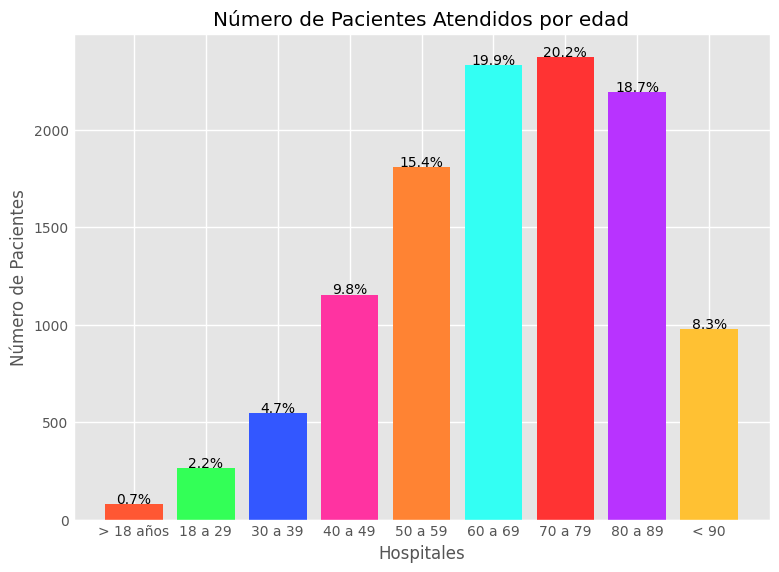

In [111]:
# Crear gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(hospitales_list, pacientes_list, color=colors)  # Pasamos las etiquetas y la altura

# Añadir etiquetas de los ejes
plt.xlabel('Edades')
plt.ylabel('Número de Pacientes')

# Añadir título
plt.title('Número de Pacientes Atendidos por edad')

# Añadir etiquetas de porcentaje en la parte superior de cada barra
total_pacientes = sum(pacientes_list)
for i, valor in enumerate(pacientes_list):
    porcentaje = (valor / total_pacientes) * 100
    plt.text(i, valor + 5, f'{porcentaje:.1f}%', ha='center')  # Mostrar el porcentaje sobre cada barra

# Mostrar el gráfico
plt.show()

### Gráfico por estado del paciente (pastel)
Existen 3 estados: recuperado, deceso y transferido.

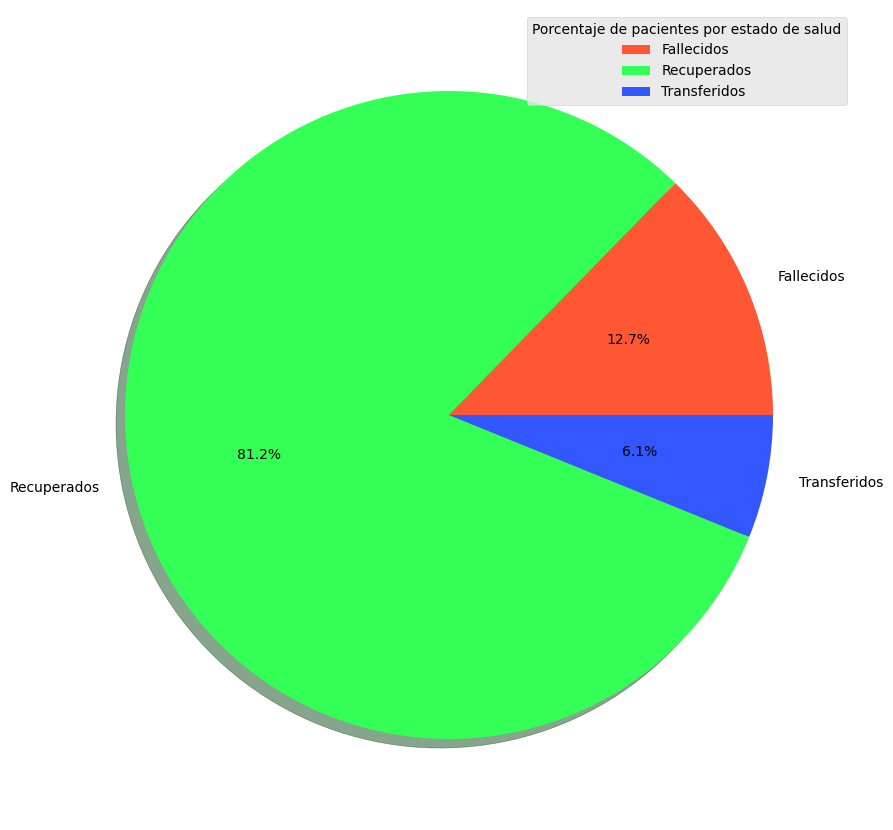

In [114]:
## Porcentaje de pacientes atendidos por cada hospital
pacientes_deceased = resultado['Total'][54]
pacientes_recovered = resultado['Total'][55]
pacientes_transfered = resultado['Total'][56]

## Enlistando los pacientes y los hospitales
pacientes_list = [pacientes_deceased, pacientes_recovered, pacientes_transfered]
hospitales_list = ['Fallecidos', 'Recuperados', 'Transferidos']

#Graficando con Matplotlib
plt.style.use('ggplot')

plt.figure(figsize=(10, 10))

colors = ['#FF5733',  # Rojo anaranjado
          '#33FF57',  # Verde brillante
          '#3357FF',  # Azul brillante
          '#FF33A1',  # Rosa
          '#FF8333',  # Naranja claro
          '#33FFF3',  # Aqua
          '#FF3333',  # Rojo
          '#B833FF',  # Púrpura
          '#FFC133']  # Amarillo dorado


#El gráfico unicamente requiere una lista con los datos, y una con los labels
plt.pie(pacientes_list, labels=hospitales_list, colors=colors, autopct='%1.1f%%', shadow=True)
plt.legend(title='Porcentaje de pacientes por estado de salud')
plt.show()

### Gráfico por estado del paciente (barras)

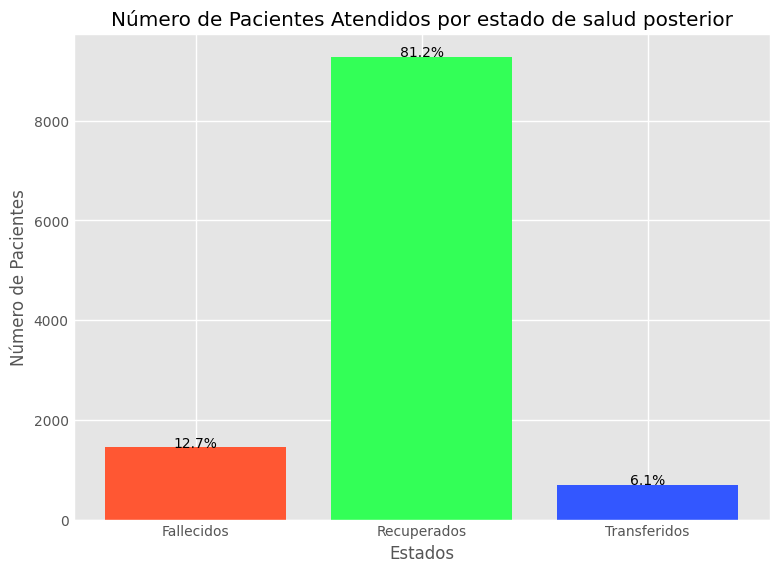

In [115]:
# Crear gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(hospitales_list, pacientes_list, color=colors)  # Pasamos las etiquetas y la altura

# Añadir etiquetas de los ejes
plt.xlabel('Estados')
plt.ylabel('Número de Pacientes')

# Añadir título
plt.title('Número de Pacientes Atendidos por estado de salud posterior')

# Añadir etiquetas de porcentaje en la parte superior de cada barra
total_pacientes = sum(pacientes_list)
for i, valor in enumerate(pacientes_list):
    porcentaje = (valor / total_pacientes) * 100
    plt.text(i, valor + 5, f'{porcentaje:.1f}%', ha='center')  # Mostrar el porcentaje sobre cada barra

# Mostrar el gráfico
plt.show()

### Gráfico por meses (pastel)

In [122]:
#Pacientes por cada mes
pacientes_january2020 = resultado['Total'][66]
pacientes_february2020 = resultado['Total'][67]
pacientes_march2020 = resultado['Total'][68]
pacientes_april2020 = resultado['Total'][69]
pacientes_may2020 = resultado['Total'][70]
pacientes_june2020 = resultado['Total'][71]
pacientes_july2020 = resultado['Total'][72]
pacientes_august2020 = resultado['Total'][73]
pacientes_september2020 = resultado['Total'][74]
pacientes_october2020 = resultado['Total'][75]
pacientes_november2020 = resultado['Total'][76]
pacientes_december2020 = resultado['Total'][77]

pacientes_january2021 = resultado['Total'][79]
pacientes_feburary2021 = resultado['Total'][80]
pacientes_march2021 = resultado['Total'][81]
pacientes_april2021 = resultado['Total'][82]
pacientes_may2021 = resultado['Total'][83]
pacientes_june2021 = resultado['Total'][84]
pacientes_july2021 = resultado['Total'][85]
pacientes_august2021 = resultado['Total'][86]
pacientes_september2021 = resultado['Total'][87]
pacientes_october2021 = resultado['Total'][88]
pacientes_november2021 = resultado['Total'][89]
pacientes_december2021 = resultado['Total'][90]

pacientes_january2022 = resultado['Total'][92]
pacientes_february2022 = resultado['Total'][93]
pacientes_march2022 = resultado['Total'][94]
pacientes_april2022 = resultado['Total'][95]

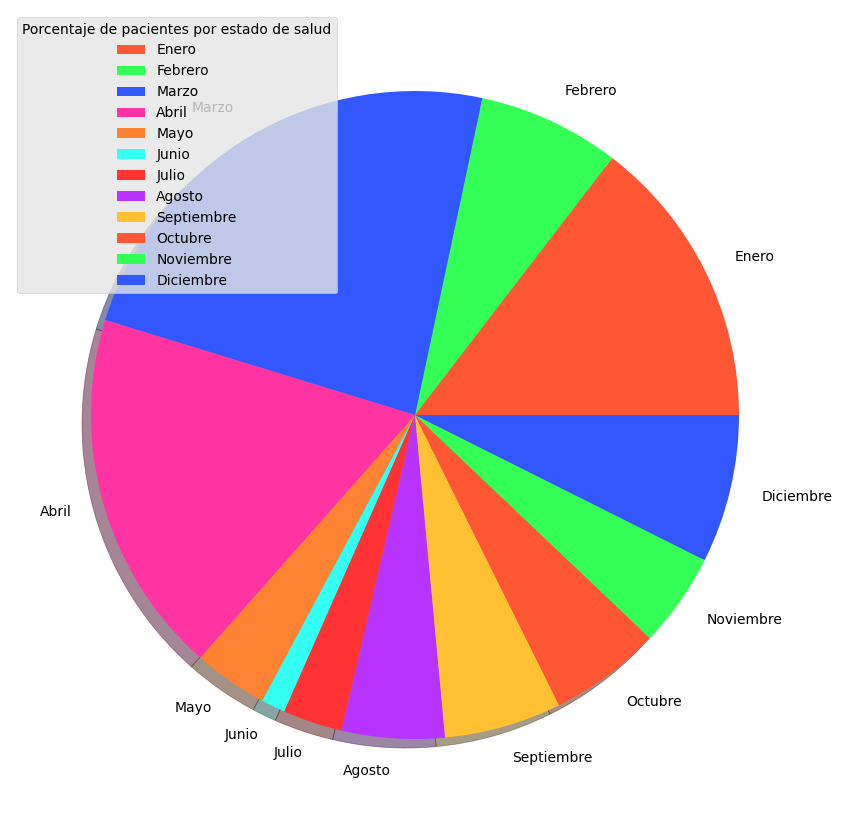

In [124]:
## Porcentaje de pacientes atendidos por cada hospital

pacientes_january = pacientes_january2020 + pacientes_january2021 + pacientes_january2022
pacientes_february = pacientes_february2020 + pacientes_feburary2021 + pacientes_february2022 
pacientes_march = pacientes_march2020 + pacientes_march2021 + pacientes_march2022
pacientes_april = pacientes_april2020 + pacientes_april2021 + pacientes_april2022
pacientes_may = pacientes_may2020 + pacientes_may2021
pacientes_june = pacientes_june2020 + pacientes_june2021
pacientes_july = pacientes_july2020 + pacientes_july2021
pacientes_august = pacientes_august2020 + pacientes_august2021
pacientes_september = pacientes_september2020 + pacientes_september2021
pacientes_october = pacientes_october2020 + pacientes_october2021
pacientes_november = pacientes_november2020 + pacientes_november2021
pacientes_december = pacientes_december2020 + pacientes_december2021

## Enlistando los pacientes y los hospitales
pacientes_list = [pacientes_january, pacientes_february, pacientes_march, pacientes_april, pacientes_may, pacientes_june, pacientes_july, pacientes_august, pacientes_september, pacientes_october, pacientes_november, pacientes_december]
meses_list = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
#Graficando con Matplotlib
plt.style.use('ggplot')

plt.figure(figsize=(10, 10))

colors = ['#FF5733',  # Rojo anaranjado
          '#33FF57',  # Verde brillante
          '#3357FF',  # Azul brillante
          '#FF33A1',  # Rosa
          '#FF8333',  # Naranja claro
          '#33FFF3',  # Aqua
          '#FF3333',  # Rojo
          '#B833FF',  # Púrpura
          '#FFC133']  # Amarillo dorado


#El gráfico unicamente requiere una lista con los datos, y una con los labels
plt.pie(pacientes_list, labels=meses_list, colors=colors, autopct='%1.1f%%', shadow=True)
plt.legend(title='Porcentaje de pacientes por estado de salud')
plt.show()

### Gráfico por comorbilidades

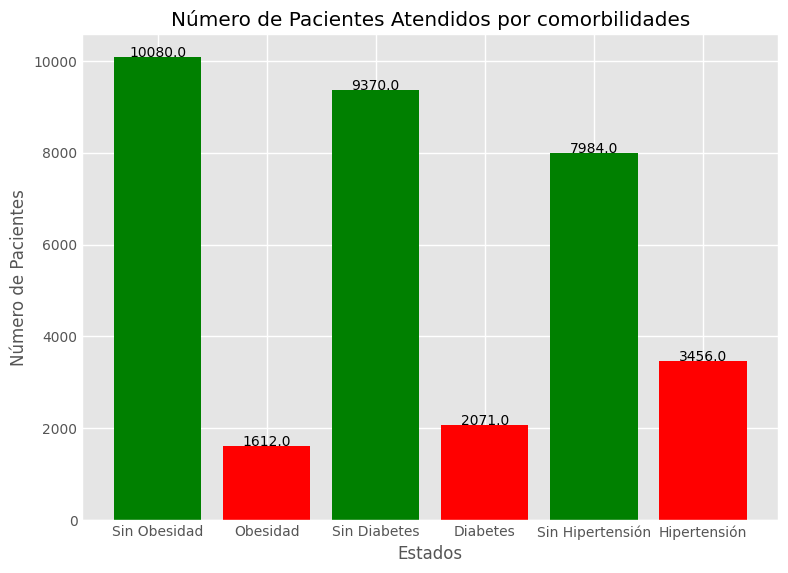

In [134]:
#Pacientes por cada mes
pacientes_no_obesity = resultado['Total'][18]
pacientes_obesity = resultado['Total'][19]

pacientes_no_diabetes = resultado['Total'][21]
pacientes_diabetes = resultado['Total'][22]

pacientes_no_hypertension = resultado['Total'][24]
pacientes_hypertension = resultado['Total'][25]

## Enlistando los pacientes y los hospitales
pacientes_list = [pacientes_no_obesity, pacientes_obesity, pacientes_no_diabetes, pacientes_diabetes, pacientes_no_hypertension, pacientes_hypertension]
comorbilidades_list = ['Sin Obesidad', 'Obesidad', 'Sin Diabetes', 'Diabetes', 'Sin Hipertensión', 'Hipertensión']

colors = ['green', 'red']

# Crear gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(comorbilidades_list, pacientes_list, color=colors)  # Pasamos las etiquetas y la altura

# Añadir etiquetas de los ejes
plt.xlabel('Estados')
plt.ylabel('Número de Pacientes')

# Añadir título
plt.title('Número de Pacientes Atendidos por comorbilidades')

# Añadir etiquetas de porcentaje en la parte superior de cada barra
total_pacientes = sum(pacientes_list)
for i, valor in enumerate(pacientes_list):
    plt.text(i, valor + 5, f'{valor}', ha='center')  # Mostrar el porcentaje sobre cada barra

# Mostrar el gráfico
plt.show()